## Exploratory Data Analysis: STEAD Seismic Signal Dataset

The purpose of this notebook is to conduct exploratory data analysis on the STEAD Seismic Signal Dataset.

To do this, the STEAD dataset was first downloaded locally from https://github.com/smousavi05/STEAD, and then preprocessed using the `data_preprocessing.py` module, as demonstrated in the `data_preprocessing.ipynb` notebook. The preprocessed data was saved to a local directory for analysis and model training.

### Environment setup

In [4]:
import sys
# sys.path.append('../')
# sys.path.append('../../..')

import cartopy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
plt.ioff() # Turn off matplotlib interactive mode. Prevents  memory leakage.

### Load preprocessed data

In [6]:
# Load extracted raw signals
raw_signals = np.load('/content/drive/MyDrive/Earthquake_Detection/DATA/extracted_raw_signals_subsample_10000.npy')

# Load created waveform images
waveform_imgs = np.load('/content/drive/MyDrive/Earthquake_Detection/DATA/created_waveform_images_subsample_10000.npy')

# Load created spectrogram images
spectrogram_imgs = np.load('/content/drive/MyDrive/Earthquake_Detection/DATA/created_spectrogram_images_subsample_10000.npy')

# Load extracted raw signals
metadata = pd.read_feather('/content/drive/MyDrive/Earthquake_Detection/DATA/extracted_metadata_subsample_10000.feather')
metadata = metadata.reset_index()

In [7]:
metadata

,trace_name,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,...,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,chunk,weight_for_subsample
0,ATH.HL_20141117231337_EV,HL,ATH,HH,37.973840,23.717670,93.0,500.0,manual,0.50,...,None,0.71000,79.01,161.900,[33.70000076 32.09999847 24.5 ],[[5276.]],2014-11-17 23:13:38.480000,earthquake_local,1,0.000033
1,AUQ.AV_20140311230706_EV,AV,AUQ,BH,59.354900,-153.414300,647.0,800.0,manual,1.00,...,None,0.44727,49.65,8.828,[30. 24.5 29.10000038],[[3960.]],2014-03-11 23:07:06.230000,earthquake_local,1,0.000033
2,B081.PB_20110303193132_EV,PB,B081,EH,33.711167,-116.714167,1467.0,700.0,manual,0.23,...,None,0.77320,85.83,12.000,[39.40000153 37. 34.29999924],[[2809.]],2011-03-03 19:31:32.360000,earthquake_local,1,0.000033
3,B086.PB_20140320053737_EV,PB,B086,HH,33.557500,-116.531000,1392.0,601.0,autopicker,0.93,...,None,0.08935,9.94,149.000,[19.10000038 18.20000076 26.29999924],[[1547.]],2014-03-20 05:37:38.030000,earthquake_local,1,0.000033
4,JGR.NC_200405070749_NO,NC,JGR,HN,37.516040,-122.458150,282.0,NaN,None,NaN,...,None,NaN,NaN,NaN,None,None,2004-05-07 07:49:00,noise,1,0.000050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ANVS.KR_20180116203511_NO,KR,ANVS,BH,42.786110,77.667221,1864.0,NaN,None,NaN,...,None,NaN,NaN,NaN,None,None,2018-01-16 20:35:11,noise,1,0.000050
9996,PB11.TX_20200323225612_NO,TX,PB11,HH,31.935530,-104.034119,915.0,NaN,None,NaN,...,None,NaN,NaN,NaN,None,None,2020-03-23 22:56:12,noise,1,0.000050
9997,PB12.TX_20200319205754_NO,TX,PB12,HH,31.213240,-103.957703,961.6,NaN,None,NaN,...,None,NaN,NaN,NaN,None,None,2020-03-19 20:57:54,noise,1,0.000050
9998,B084.PB_20150429153029_EV,PB,B084,HH,33.611570,-116.456370,1271.0,900.0,manual,0.62,...,None,0.14580,16.21,220.100,[25.79999924 29.10000038 37.90000153],[[1537.]],2015-04-29 15:30:30.480000,earthquake_local,1,0.000033


### Describe data

In [8]:
metadata.describe()

,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_weight,p_travel_sec,s_arrival_sample,s_weight,source_origin_uncertainty_sec,source_latitude,...,source_gap_deg,source_horizontal_uncertainty_km,source_depth_km,source_depth_uncertainty_km,source_magnitude,source_distance_deg,source_distance_km,back_azimuth_deg,chunk,weight_for_subsample
count,10000.000000,10000.000000,10000.000000,5016.000000,5015.000000,5016.000000,5016.000000,5015.000000,414.000000,5016.000000,...,2071.000000,2003.000000,5016.00000,1808.00000,5016.000000,5016.000000,5016.000000,5016.000000,10000.0,10000.000000
mean,33.026727,-99.782263,919.234000,663.346624,0.688584,7.381734,1204.290638,0.621737,0.871836,33.786371,...,104.046849,0.964330,13.33613,1.06219,1.325805,0.368983,41.027687,197.647686,1.0,0.000042
std,18.394488,61.493691,710.952019,178.411927,0.179976,5.613427,457.074727,0.209233,0.603540,10.936191,...,58.968365,1.584847,16.33010,1.60420,0.845538,0.330146,36.665088,96.310634,0.0,0.000008
min,-77.849200,-178.856600,-413.000000,284.500000,0.000000,0.430000,418.500000,0.000000,0.000000,-29.461200,...,12.000000,0.000000,-1.42000,0.00000,0.000000,0.007580,0.840000,0.000000,1.0,0.000033
25%,33.557500,-121.773178,266.000000,500.000000,0.590000,3.420000,912.000000,0.560000,0.572500,33.468125,...,61.253000,0.290000,6.28750,0.50000,0.720000,0.142375,15.850000,130.875000,1.0,0.000033
50%,33.711167,-116.596005,961.600000,699.000000,0.630000,5.700000,1119.000000,0.590000,0.840000,33.657835,...,92.000000,0.400000,10.19500,0.65000,1.130000,0.279600,31.095000,187.600000,1.0,0.000033
75%,38.710730,-112.811500,1374.800000,800.000000,0.890000,9.562500,1381.250000,0.770000,1.077500,34.330125,...,130.791500,0.600000,14.81000,0.93000,1.740000,0.490425,54.532500,290.650000,1.0,0.000050
max,77.444702,179.627700,4580.000000,1752.566700,1.000000,46.480000,4786.000000,1.000000,8.640000,65.862000,...,359.000000,9.948160,233.10000,14.90000,6.020000,2.897800,321.660000,359.700000,1.0,0.000050


### Plot example waveform and spectrogram for an example signal

<ipython-input-9-0a4d68b1f4f7>:36: MatplotlibDeprecationWarning: Passing the NFFT parameter of psd() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  ax3.psd(raw_signals[i][:,2], 256, 100, color='navy') # plot power spectral density


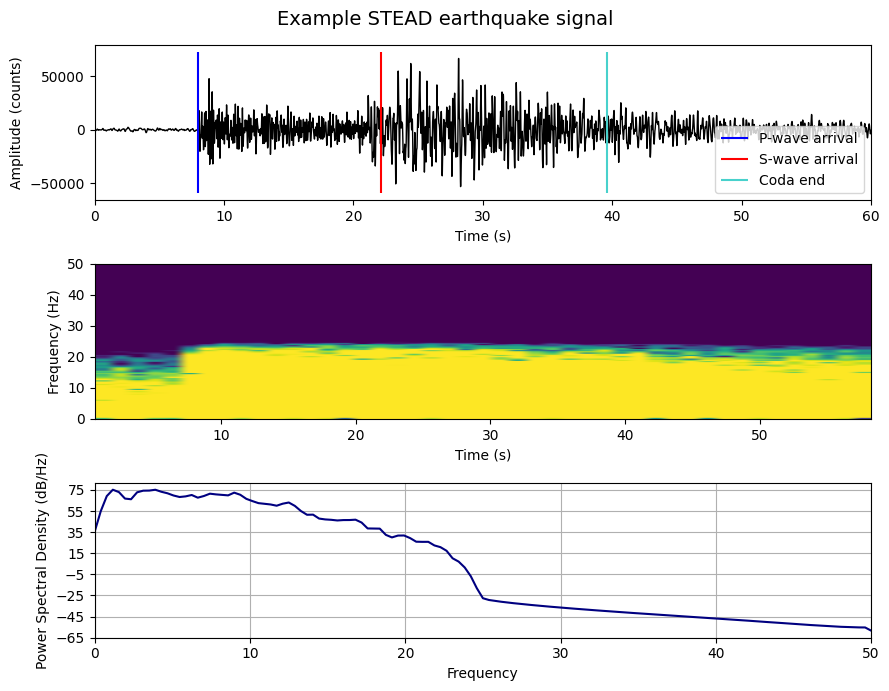

The p-wave for this waveform was picked by: manual
The s-wave for this waveform was picked by: manual


In [9]:
i = 1

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(9,7))
ax1.plot(np.linspace(0,60,6000),raw_signals[i][:,2],color='k',linewidth=1) # plot waveform
ymin, ymax = ax1.get_ylim()
ax1.vlines(metadata.iloc[i]['p_arrival_sample']/100, ymin, ymax, color='b', linewidth=1.5, label='P-wave arrival') # plot p-wave arrival time
ax1.vlines(metadata.iloc[i]['s_arrival_sample']/100, ymin, ymax, color='r', linewidth=1.5, label='S-wave arrival') # plot s-wave arrival time

# Check if the coda end sample value is not None before processing and plotting
coda_end_sample_str = metadata['coda_end_sample'].iloc[i]
if coda_end_sample_str is not None:
    # Assuming the format is a string like '[value]' or 'value.' or 'value'
    # First, remove leading/trailing whitespace and potential brackets
    coda_end_value_clean = coda_end_sample_str.strip('[] ').replace('.', '')
    try:
        # Attempt to convert to integer
        coda_end_sample = int(coda_end_value_clean)
        # Plot the coda end line if conversion is successful
        ax1.vlines(coda_end_sample/100, ymin, ymax, color='mediumturquoise', linewidth=1.5, label='Coda end')
    except ValueError:
        # Handle cases where the cleaned string cannot be converted to an integer
        print(f"Warning: Could not convert 'coda_end_sample' for index {i} to integer: {coda_end_sample_str}")
        # You might want to skip plotting the line or log this issue
else:
    print(f"Warning: 'coda_end_sample' for index {i} is None.")
    # Skip plotting the line as the data is missing


ax1.set_xlim([0,60])
ax1.legend(loc='lower right',fontsize=10)
ax1.set_ylabel('Amplitude (counts)')
ax1.set_xlabel('Time (s)')
im = ax2.specgram(raw_signals[i][:,2],Fs=100,NFFT=256,cmap='viridis',vmin=-10,vmax=25); # plot spectrogram
ax2.set_ylabel('Frequency (Hz)')
ax2.set_xlabel('Time (s)')
ax3.psd(raw_signals[i][:,2], 256, 100, color='navy') # plot power spectral density
ax3.set_xlim([0,50])
plt.suptitle('Example STEAD earthquake signal', fontsize=14)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Earthquake_Detection/Plots/waveform_spectrogram_plot.png',dpi=500)
plt.show()

print('The p-wave for this waveform was picked by: ' + str(metadata.iloc[i]['p_status'])) # Ensure it's a string for concatenation
print('The s-wave for this waveform was picked by: ' + str(metadata.iloc[i]['s_status'])) # Ensure it's a string for concatenation

### Plot earthquake magnitudes, depths, and distances from receiver

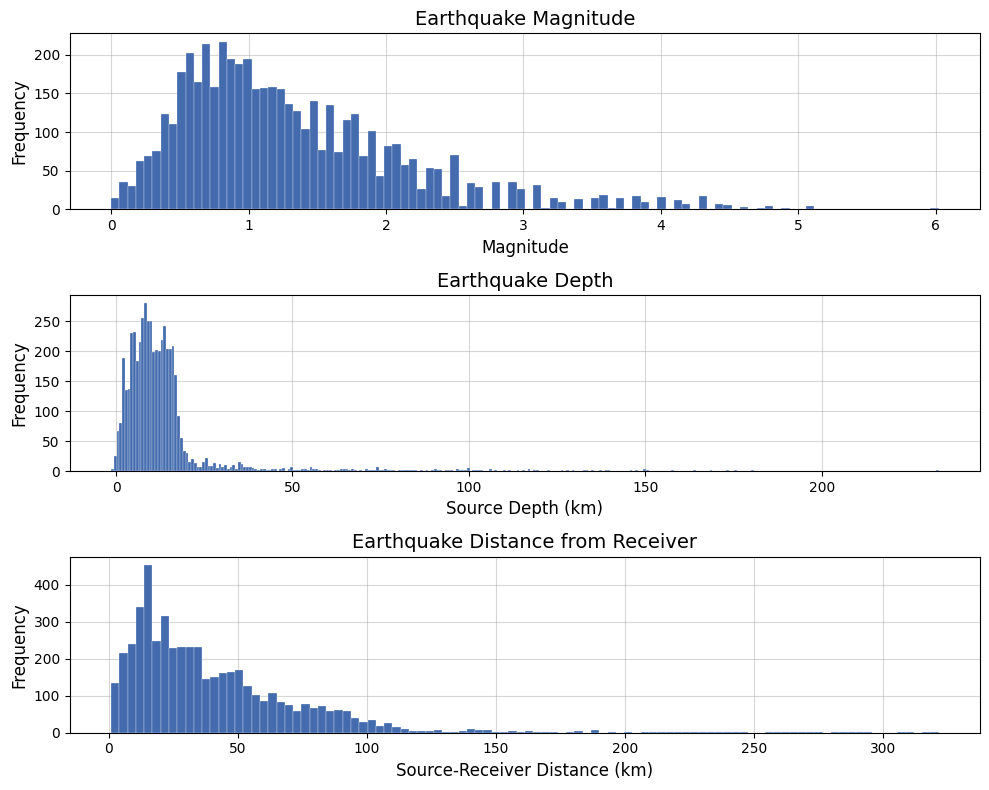

In [10]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,8))
ax1.grid(True, alpha=0.5, zorder=0)
ax1.hist(metadata['source_magnitude'],bins=100, color='xkcd:french blue', edgecolor='white', linewidth=0.2, zorder=3) # plot earthquake source magnitude
ax1.set_xlabel('Magnitude',fontsize=12)
ax1.set_ylabel('Frequency',fontsize=12)
ax1.set_title('Earthquake Magnitude',fontsize=14)
ax2.grid(True, alpha=0.5, zorder=0)
ax2.hist(metadata['source_depth_km'], bins=300, color='xkcd:french blue', edgecolor='white', linewidth=0.2, zorder=3)
ax2.set_xlabel('Source Depth (km)',fontsize=12) # plot earthquake source depth
ax2.set_ylabel('Frequency',fontsize=12)
ax2.set_title('Earthquake Depth',fontsize=14)
ax3.grid(True, alpha=0.5, zorder=10)
ax3.hist(metadata['source_distance_km'],bins=100, color='xkcd:french blue', edgecolor='white', linewidth=0.2, zorder=3)
ax3.set_xlabel('Source-Receiver Distance (km)',fontsize=12) # plot distance from earthquake to station
ax3.set_ylabel('Frequency',fontsize=12)
ax3.set_title('Earthquake Distance from Receiver',fontsize=14)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Earthquake_Detection/Plots/mags_depths_distances.png',dpi=500)
plt.show()

### Plot earthquake locations

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


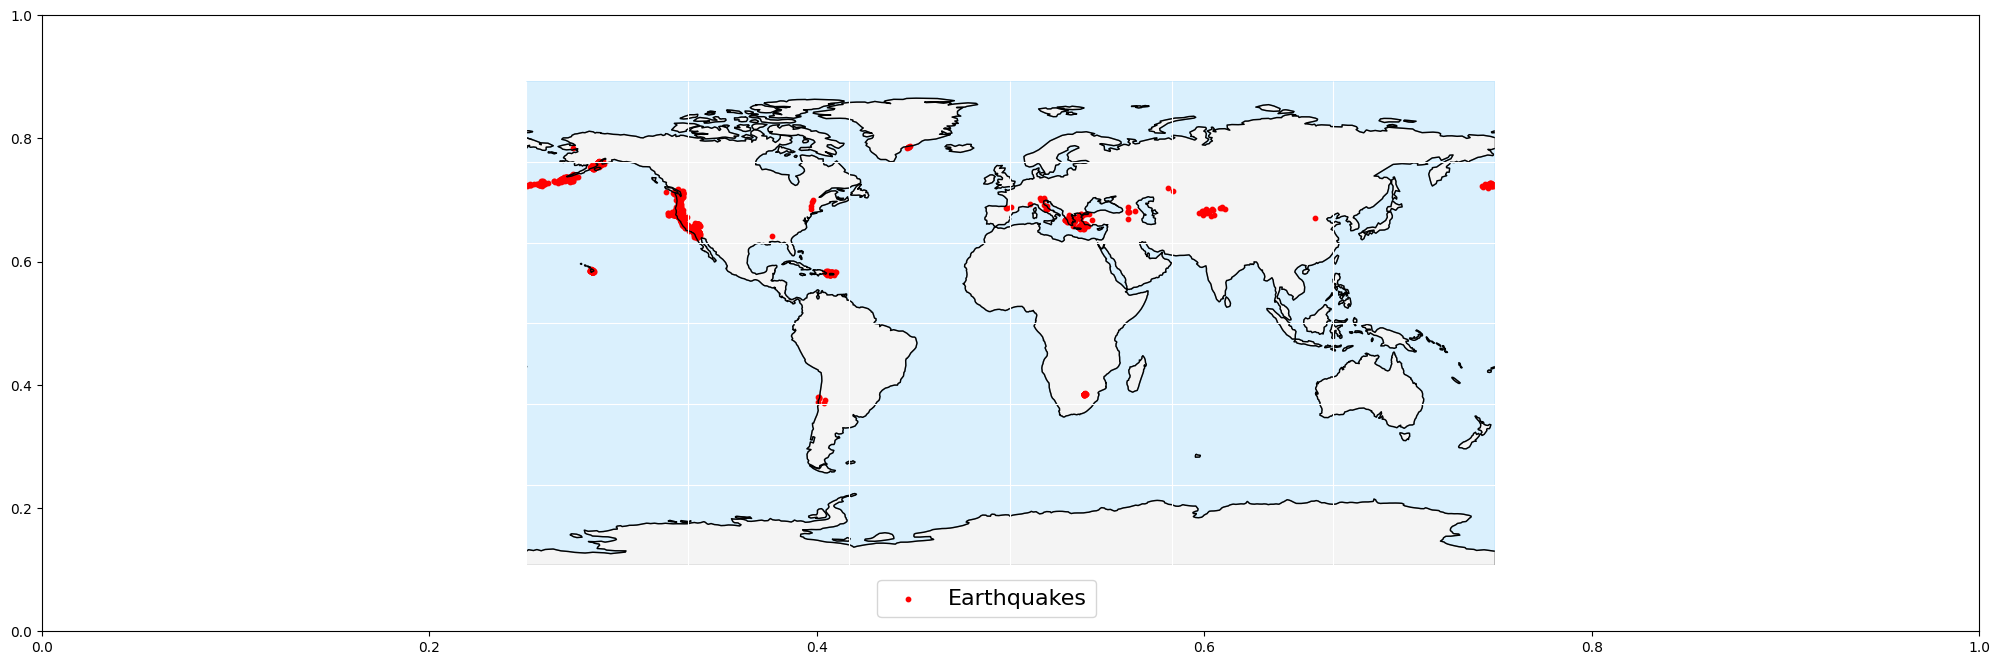

In [11]:
lats = metadata['source_latitude'] # get earthquake latitudes
lons = metadata['source_longitude'] # get earthquake longitudes
sizes = metadata['source_magnitude'] # get earthquake magnitudes to plot point sizes

fig, ax = plt.subplots(figsize=(25,8))
ax = plt.axes(projection=cartopy.crs.PlateCarree()) # choose a map projection using Cartopy
ax.axis('off')
ax.coastlines() # add coastlines to map
ax.add_feature(cartopy.feature.OCEAN,color='lightskyblue',alpha=0.3) # fill ocean with color
ax.add_feature(cartopy.feature.LAND, facecolor='gainsboro',edgecolor='black',alpha=0.3) # fill land with color
ax.gridlines(color='white')
ax.scatter(lons,lats,c='red',s=10, marker='o', transform=cartopy.crs.PlateCarree(),label='Earthquakes') # add points represnting each earthquake location
ax.set_xlim([-360,360])
ax.set_ylim([-90,90])
ax.legend(loc='lower right', bbox_to_anchor=(0.55,-0.13), fontsize=16)
plt.savefig('/content/drive/MyDrive/Earthquake_Detection/Plots/earthquake_map.png',dpi=500)
plt.show()

### Plot seismic station locations

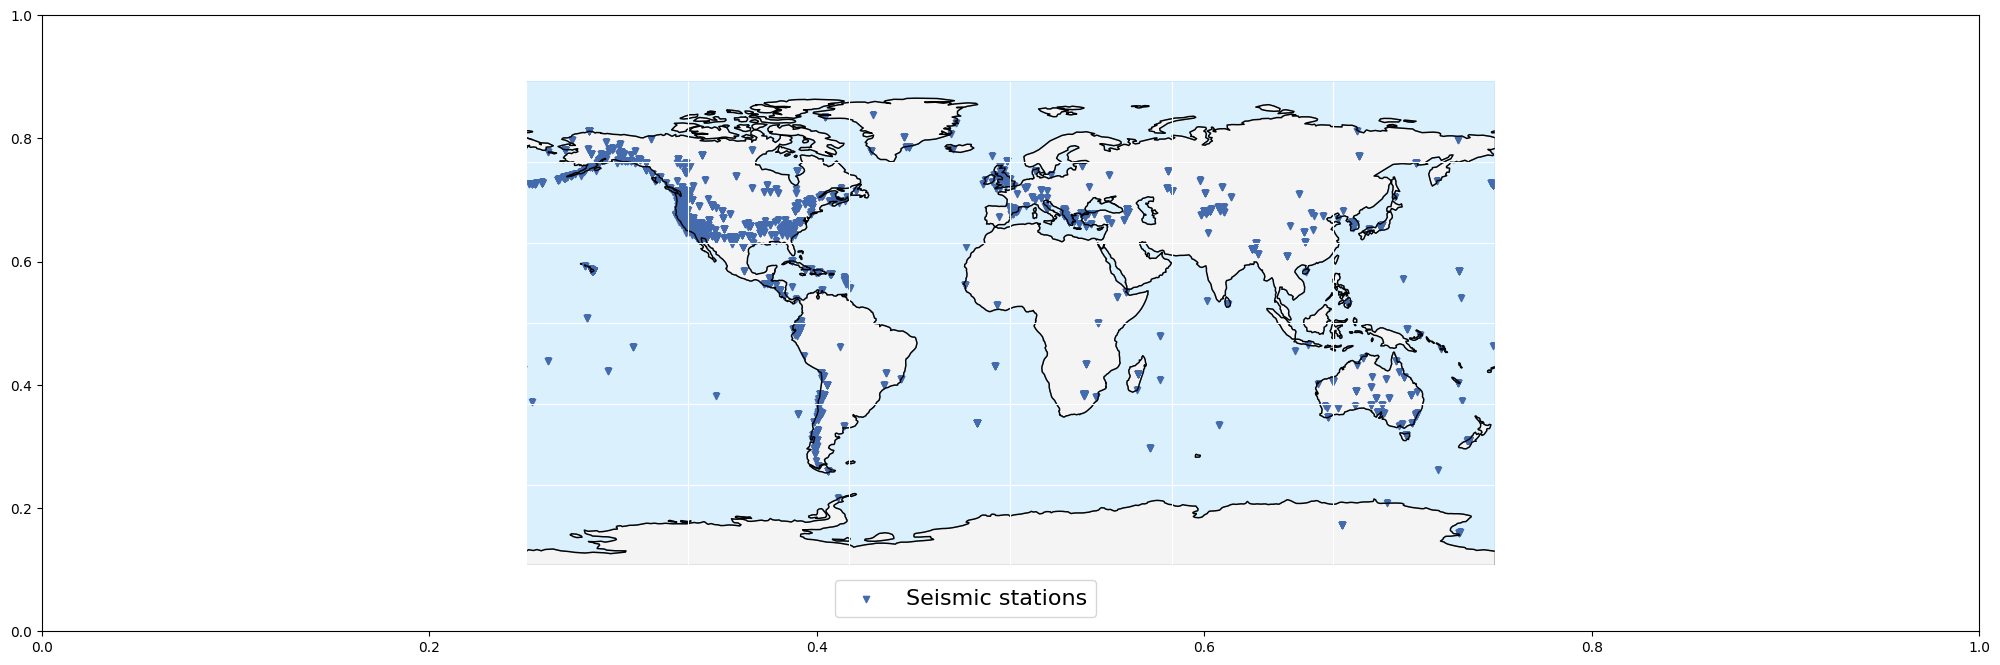

In [12]:
lats = metadata['receiver_latitude'] # get seismic station latitudes
lons = metadata['receiver_longitude'] # get seismic station longitudes

fig, ax = plt.subplots(figsize=(25,8))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN,color='lightskyblue',alpha=0.3)
ax.add_feature(cartopy.feature.LAND, facecolor='gainsboro',edgecolor='black',alpha=0.3)
ax.gridlines(color='white')
ax.scatter(lons,lats,c='xkcd:french blue',marker='v',s=20,transform=cartopy.crs.PlateCarree(),label='Seismic stations')
ax.set_xlim([-360,360])
ax.set_ylim([-90,90])
ax.legend(loc='lower right', bbox_to_anchor=(0.55,-0.13), fontsize=16)
ax.axis('off')
plt.savefig('/content/drive/MyDrive/Earthquake_Detection/Plots//station_map.png',dpi=500)
plt.show()

### Plot P-wave and S-wave arrival times

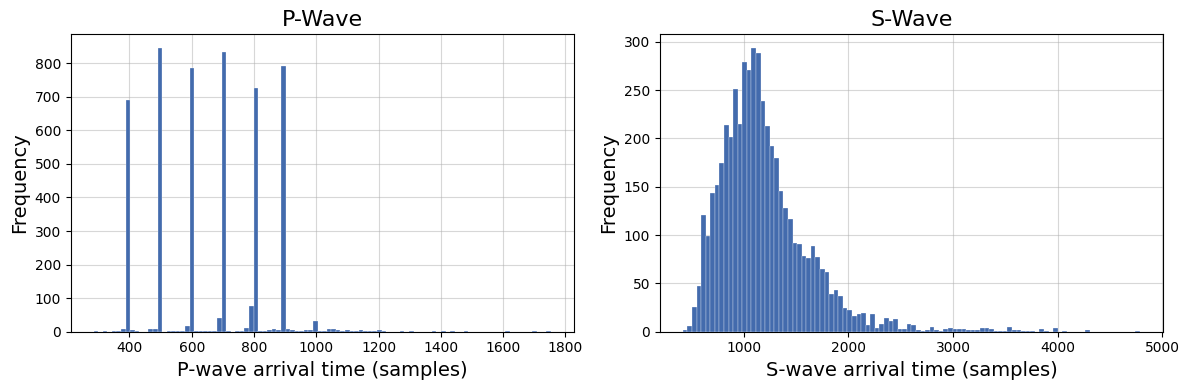

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.hist(metadata['p_arrival_sample'],bins=100, color='xkcd:french blue', edgecolor='white', linewidth=0.2, zorder=5) # plot earthquake source magnitude
ax1.set_xlabel('P-wave arrival time (samples)',fontsize=14)
ax1.set_ylabel('Frequency',fontsize=14)
ax1.set_title('P-Wave',fontsize=16)
ax1.grid(True, alpha=0.5, zorder=0)
ax2.hist(metadata['s_arrival_sample'], bins=100, color='xkcd:french blue', edgecolor='white', linewidth=0.2, zorder=5)
ax2.set_xlabel('S-wave arrival time (samples)',fontsize=14) # plot earthquake source depth
ax2.set_ylabel('Frequency',fontsize=14)
ax2.set_title('S-Wave',fontsize=16)
ax2.grid(True, alpha=0.5, zorder=0)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Earthquake_Detection/Plots//arrival_times.png',dpi=500)
plt.show()

### Plot example earthquake signals

In [14]:
# Get random example earthquakes
example_earthquakes = metadata[metadata['trace_category']=='earthquake_local'].sample(4)
example_earthquake_indices = list(example_earthquakes.index)

# Get random example noise
example_noise = metadata[metadata['trace_category']=='noise'].sample(4)
example_noise_indices = list(example_noise.index)

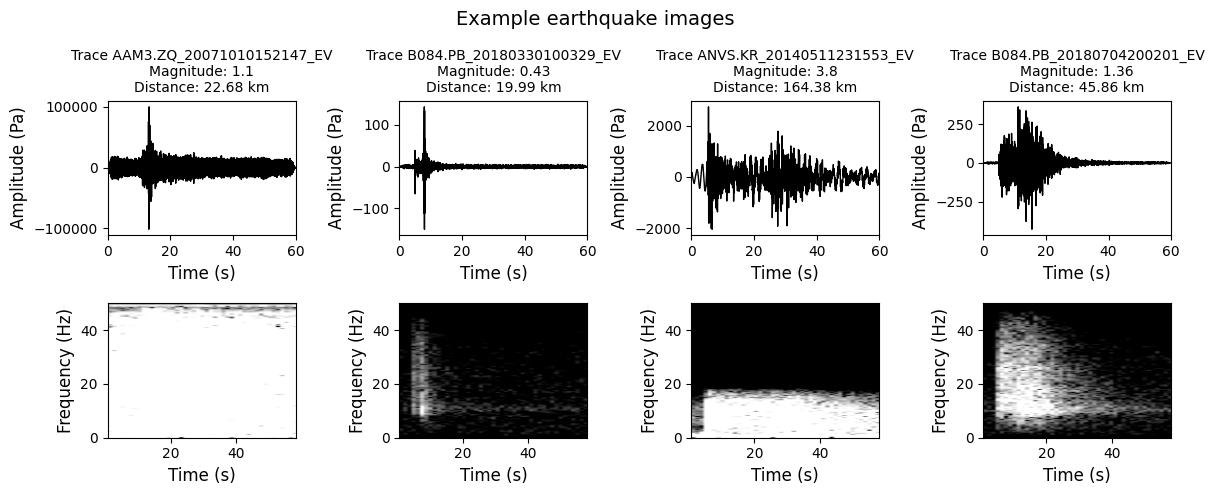

In [15]:
# Plot example earthquakes - waveforms and spectrograms
fig, axs = plt.subplots(2,4,figsize=(12,5))
count = 0
for i, ax in enumerate(axs.flatten()):
    if count < 4:
        x = np.linspace(0,60,6000)
        ax.plot(x, raw_signals[example_earthquake_indices[i]][:,2], color='k', linewidth=1) # select only the z-axis component of the signal
        ax.set_xlim([0,60])
        ax.set_ylabel('Amplitude (Pa)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)
        trace_name = example_earthquakes.iloc[i]['trace_name']
        mag = example_earthquakes.iloc[i]['source_magnitude']
        dist = example_earthquakes.iloc[i]['source_distance_km']
        ax.set_title(f'Trace {trace_name}\nMagnitude: {mag}\nDistance: {dist} km', fontsize=10)
    else:
        ax.specgram(raw_signals[example_earthquake_indices[i-4]][:,2], Fs=100, NFFT=256, cmap='gray', vmin=-10, vmax=25)
        ax.set_ylabel('Frequency (Hz)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)
    count += 1
plt.suptitle(f'Example earthquake images',fontsize=14)
plt.tight_layout()
plt.show()

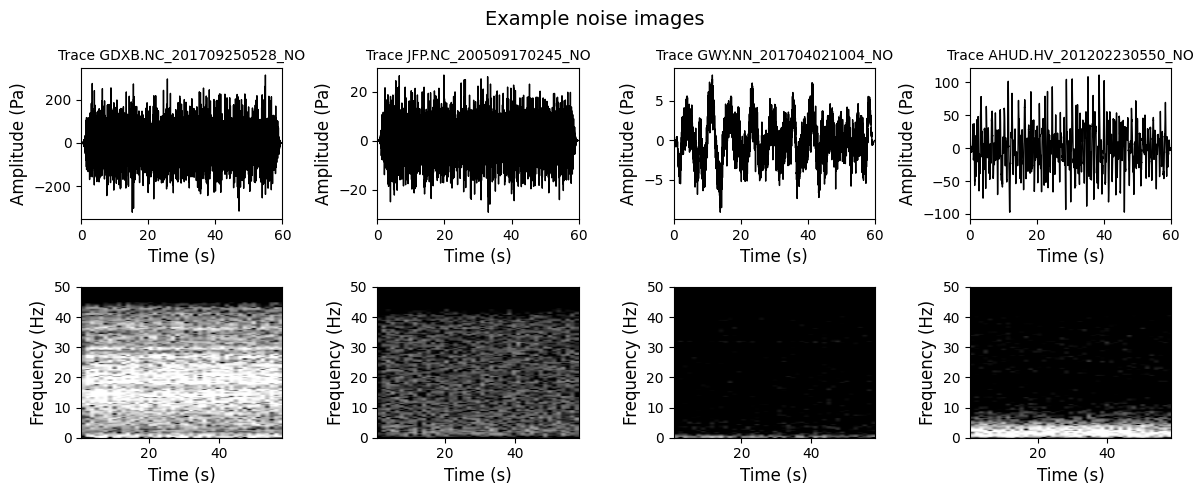

In [16]:
# Plot example noise - waveforms and spectrograms
fig, axs = plt.subplots(2,4,figsize=(12,5))
count = 0
for i, ax in enumerate(axs.flatten()):
    if count < 4:
        x = np.linspace(0,60,6000)
        ax.plot(x, raw_signals[example_noise_indices[i]][:,2], color='k', linewidth=1) # select only the z-axis component of the signal
        ax.set_xlim([0,60])
        ax.set_ylabel('Amplitude (Pa)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)
        trace_name = example_noise.iloc[i]['trace_name']
        ax.set_title(f'Trace {trace_name}', fontsize=10)
    else:
        ax.specgram(raw_signals[example_noise_indices[i-4]][:,2], Fs=100, NFFT=256, cmap='gray', vmin=-10, vmax=25)
        ax.set_ylabel('Frequency (Hz)',fontsize=12)
        ax.set_xlabel('Time (s)',fontsize=12)
    count += 1
plt.suptitle(f'Example noise images',fontsize=14)
plt.tight_layout()
plt.show()